In [47]:
from kaleido.scopes.plotly import PlotlyScope
import optuna
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import imp  
import customplots as cplot
imp.reload(cplot)
import plotly.graph_objects as go
study = optuna.create_study(study_name='Study_ALL', storage='sqlite:///../../feature_extraction/optuna_round2.db',load_if_exists=True)
params = [k for k in optuna.importance.get_param_importances(study)]
    
icy=['rgb(0,0,0)','rgb(50,50,140)','rgb(70,70,160)','rgb(110,110,200)','rgb(130,130,210)',
     'rgb(150,150,230)', 'rgb(170,170,255)','rgb(190,190,255)',
     'rgb(200,200,255)','rgb(210,210,255)','rgb(220,220,255)','rgb(240,240,255)']
icy_r=icy.copy()
icy_r.reverse()

[I 2020-08-06 17:52:12,906] Using an existing study with name 'Study_ALL' instead of creating a new one.


ValueError: Cannot evaluate parameter importances with only a single trial.

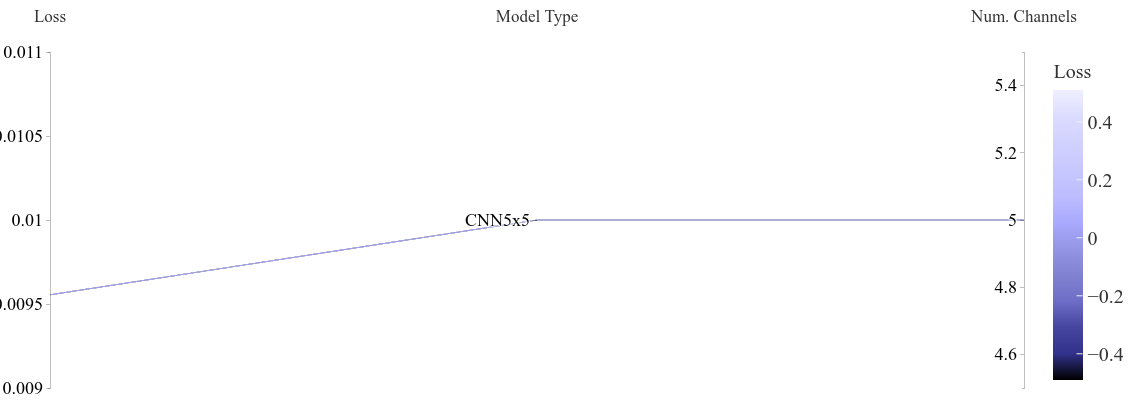

In [44]:
imp.reload(cplot)


fig=cplot.get_parallel_coordinate_plot(study,coloring=icy,logLoss=False)
scope = PlotlyScope()
fig= fig.update_layout(   
    autosize=False,title_text='Loss vs Hyper-Parameter Parallel Plot',title=None, title_x=0.5, title_y=0.98, 
    template="ggplot2",
    width=1000,
    height=400,
    font_family="Times New Roman",
    font_size=20,
    title_font_family="Times New Roman",
    title_font_size=30,           
       margin=dict(l=50, t=50,r=1,  b=10),
    )

with open("parallel_coordround2.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=1000,height=400,))
fig

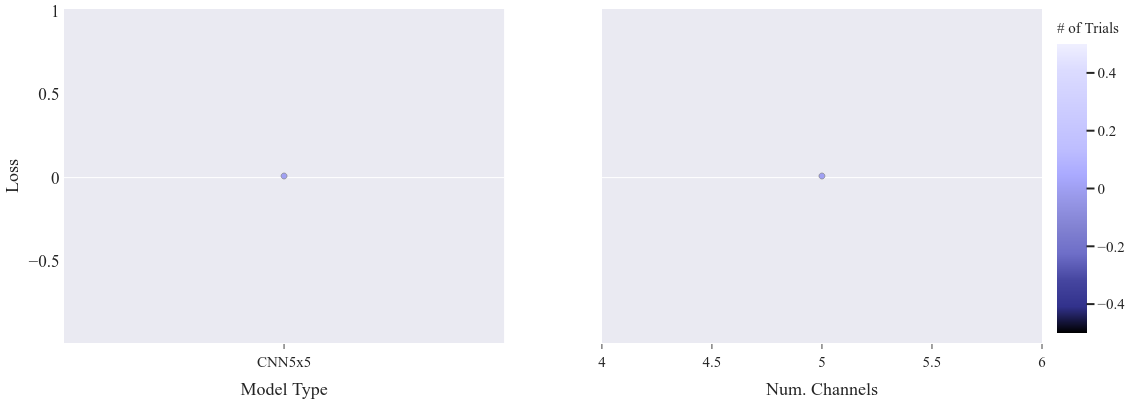

In [45]:
imp.reload(cplot)
fig=cplot.get_slice_plot(study,objective_value="Loss")
fig.update_layout(
    autosize=False,title_text='Loss vs Hyper-Parameter Slice Plot',title=None, title_x=0.5, title_y=0.98,
    template="seaborn",
    width=1100,height=400,
    font_family="Times New Roman",
    font_size=15,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=5,r=1,  b=10),                                   
    )

fig.update_xaxes(showgrid=False,zeroline=False,tickangle=0, tickfont=dict(size=15),)

fig.update_yaxes(showgrid=False,tickangle=0, tickfont=dict(size=17),)

fig.update_traces(marker=dict(colorscale=icy))

with open("slice_plotround2.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=1100,height=420,))

fig


In [46]:
imp.reload(cplot)
scope = PlotlyScope()
iceice=px.colors.sequential.deep_r.copy()
iceice[-3]="#338866"
print(iceice)
fig=cplot.get_intermediate_plot(study,topx=9,num_trials_threshold=50,color_scale=iceice)


fig.update_layout(
    autosize=False,title_text='Loss Per Training Step', title=None, title_x=0.5, title_y=0.98,
    template="seaborn",
width=900,height=500,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=5,r=1,  b=1),
    legend_title_text="Trial #",
                  legend=dict(
                      bgcolor='rgba(220,220,230,0.8)',
                  orientation="v",
                yanchor="top",
                y=1,
                xanchor="right",x=1)
    )
fig.update_xaxes(showgrid=False,zeroline=False,)
fig.update_yaxes(showgrid=False,zeroline=False,title_text="Loss")

with open("loss_per_traininground2.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf",    width=1000,height=500,))
fig

['rgb(39, 26, 44)', 'rgb(54, 43, 77)', 'rgb(64, 60, 115)', 'rgb(62, 82, 143)', 'rgb(62, 108, 150)', 'rgb(68, 130, 155)', 'rgb(76, 153, 160)', 'rgb(86, 177, 163)', 'rgb(111, 201, 163)', '#338866', 'rgb(206, 236, 179)', 'rgb(253, 253, 204)']


IndexError: single positional indexer is out-of-bounds

/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:61: ExperimentalWarning:

get_param_importances is experimental (supported from v1.3.0). The interface can change in the future.

/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:83: ExperimentalWarning:

MeanDecreaseImpurityImportanceEvaluator is experimental (supported from v1.5.0). The interface can change in the future.



OrderedDict([('Latent Size', 0.5674083463653634), ('Model Type', 0.3453822933953412), ('Num. Channels', 0.08720936023929543)])


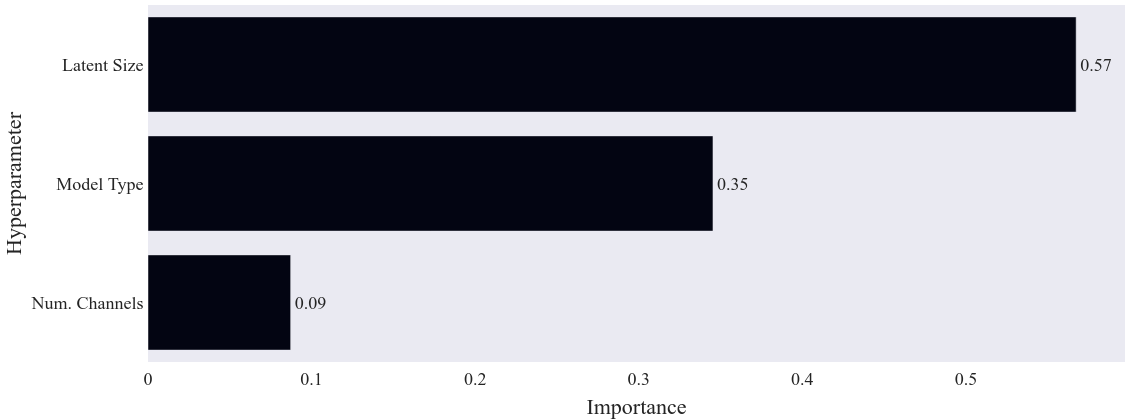

In [38]:
imp.reload(cplot)
importances=optuna.importance.get_param_importances(study,params=[p for p in params if p!=""])
fig=cplot.plot_param_importances(importances,study)
fig.update_layout(
    autosize=False,title_text='Hyper-Parameter Importances', title=None, title_x=0.5, title_y=0.98,
    template="seaborn",
    width=800,height=420,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=5,r=20,  b=1),                                   
    )
fig.update_xaxes(showgrid=False,zeroline=False,)
fig.update_yaxes(showgrid=False,zeroline=False,)
with open("ParameterImportancesround2.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=800,height=400,))
fig

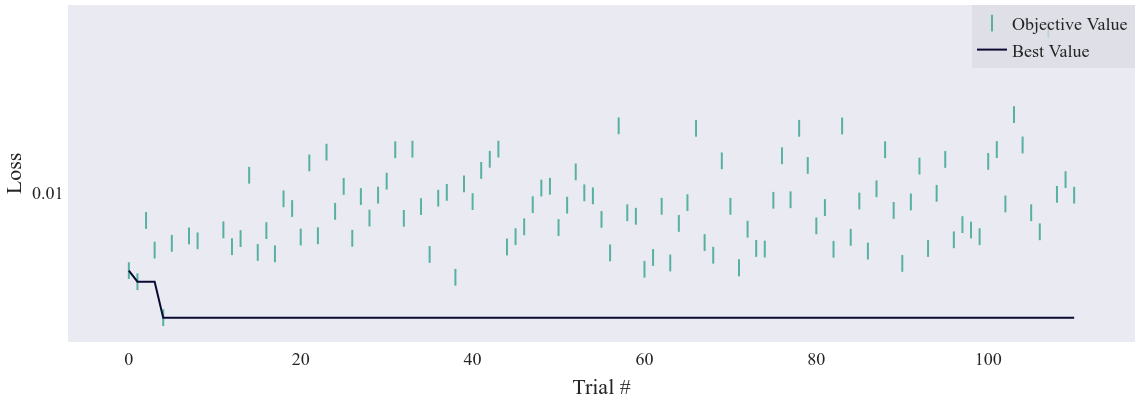

In [39]:
imp.reload(cplot)
fig = cplot.get_optimization_history_plot(study)
fig.update_layout(
    autosize=False,title_text='Optimization History', title=None, title_x=0.5, title_y=0.98, yaxis_type="log",
    template="seaborn",
    width=800,
    height=400,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=28,
    
     margin=dict( r=10, l=10, b=0, t=5),
    
              legend=dict(
                  bgcolor='rgba(220,220,230,0.8)',
                  orientation="v",
                yanchor="top",
                y=1,
                xanchor="right",x=1)
    )


fig.update_xaxes(showgrid=False,zeroline=False,title_text="Trial #")

fig.update_yaxes(showgrid=False,title_text="Loss",dtick=1)
with open("Optimization_Historyround2.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=800,height=500,  ))

fig

In [30]:
print('Best trial until now:')
print(' Value: ', study.best_trial.value)
print(' Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')
df=study.trials_dataframe()
df=df.sort_values(by=["value"],ascending=True).reset_index()
df[["value"]+["params_"+p for p in params]].to_csv("../../csvs/bestparams_round2.csv")


Best trial until now:
 Value:  0.007029084427602062
 Params: 
    Latent Size: 32
    Model Type: CNN3x3
    Num. Channels: 3


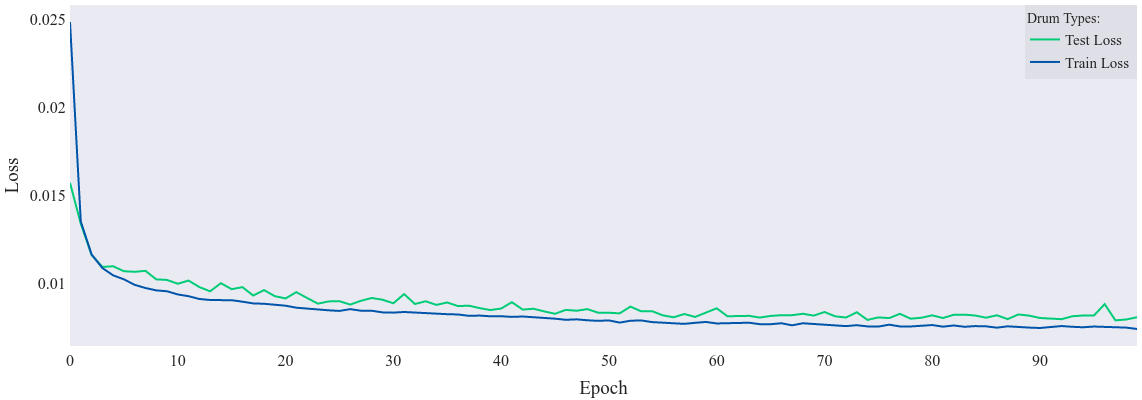

In [33]:
#test/train plot

import plotly.express as px 
import pandas as pd 
import numpy as np 
scope = PlotlyScope()
# Get some data
df = pd.read_csv('../../feature_extraction/csvs/training/both.csv')

# Plot 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['test_loss'],
    marker=dict(
        color="#00CC78"
    ),
    name="Test Loss",
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['train_loss'],
    mode='lines',
    marker=dict(
       color="#0055AA"
    ),
    name="Train Loss",
    showlegend=True
))

fig.update_layout(
 autosize=False,title_text='',title=None,title_x=0.5, title_y=0.98,
                    template="seaborn",
                    width=800,
                    height=400, margin=dict( r=5, l=10, b=0, t=5),
                    font_family="Times New Roman",
                    font_size=16,
                    title_font_family="Times New Roman",
                    title_font_size=28,
                    legend=dict(bgcolor='rgba(220,220,230,0.8)',orientation="v",yanchor="top",y=1,xanchor="right",x=1,
                        font = dict(size=15),title_font = dict(size=14)),
                    legend_title_text="Drum Types:",
                )

fig.update_xaxes(showgrid=False,zeroline=False,title_text="Epoch")
fig.update_yaxes(showgrid=False,zeroline=False,title_text="Loss")
fig.show()
with open("best_training", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=700,height=400,  ))

In [ ]:

scope = PlotlyScope()

df=pd.read_csv("../feature_extraction/csvs/df_8_2D.csv",index_col=False)

# fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="label",symbol="drum_type",hover_data=["path"],color_discrete_sequence=px.colors.qualitative.Dark2)
s_map={"tom_mid":"x","hihat_closed":"circle","synth_noise":"cross","tom_low":"diamond","tom_high":"diamond"}
fig = px.scatter(df, x="D1",y="D2",color="drum_type",symbol="drum_type",hover_data=["path"],
                    color_discrete_sequence= px.colors.sequential.RdBu_r,symbol_map=s_map)
# title_text='2 Dimensional Projection of Latent Variables'
fig.update_layout(
 autosize=False,title_text='',title=None,title_x=0.5, title_y=0.98,
                    template="seaborn",
                    width=600,
                    height=600, margin=dict( r=5, l=10, b=0, t=5),
                    font_family="Times New Roman",
                    font_size=16,
                    title_font_family="Times New Roman",
                    title_font_size=28,
                    legend=dict(bgcolor='rgba(220,220,230,0.8)',orientation="v",yanchor="top",y=1,xanchor="right",x=1,
                        font = dict(size=15),title_font = dict(size=14)),
                    legend_title_text="Drum Types:",
                )

fig.update_traces(marker=dict(size=10,opacity=1,line=dict(width=1,color='rgba(30,40,40,0.8)')))
fig.update_xaxes(showgrid=False,zeroline=False,)

fig.update_yaxes(showgrid=False,zeroline=False,)

g=fig
fig.show()
with open("t-SNE_2dround2.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=600,height=600,  ))


In [ ]:

scope = PlotlyScope()
df=pd.read_csv("../feature_extraction/csvs/df_8.csv",index_col=False)
df["size"]=24
s_map={"tom_mid":"diamond","hihat_closed":"circle","synth_noise":"circle-open","tom_low":"diamond","tom_high":"circle","kick":"circle"}
def tsne3d(symboling,coloring,cam):
    cameras= [dict(eye=dict(x=-0.3, y=1.1, z=0.1)),dict(eye=dict(x=-0.8, y=-0.8, z=0.5)),
              dict(eye=dict(x=-0.2, y=0.6, z=-0.5)),dict(eye=dict(x=0.5, y=0.4, z=-0.9))]
    camera_angle=cameras[cam]

    fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color=coloring,symbol=symboling,hover_data=["path"],
                        color_discrete_sequence= px.colors.sequential.RdBu_r,
                        symbol_map=s_map ,size_max=24,size="size" )
    fig.update_layout( legend=dict(bgcolor='rgba(220,220,230,0.9)',orientation="v",yanchor="top",y=1,xanchor="left",
                                   x=0,font = dict(size=19),title_font = dict(size=19)),
                        legend_title_text="Drum Types:",
                        scene = dict(
                        camera=camera_angle,aspectmode="auto",
                        xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",                            
                        ),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                        
                        template="seaborn",
                        width=500,height=400,  
                        margin=dict( r=0, l=0, b=0, t=0),
                        showlegend= cam == 0,
                     )
    fig.update_traces(marker=dict(opacity=1,line=dict(width=1,color='#111111')))
    fig.update_xaxes(showgrid=False,zeroline=False,)
    fig.update_yaxes(showgrid=False,zeroline=False,)
    g=fig


    name="3d_t-SNE_sym%s_cam%dround2.pdf"%(symboling,cam)
    if cam == 0:
        w,h=1000,500
    elif cam == 3:
        w,h=1000,500
    else:
        w,h=500,500
    with open(name, "wb") as f:
        f.write(scope.transform(fig, format="pdf", width=w,height=h,  ))
    return fig

for sym in ["drum_type","label"]:
    for cam in range(4):
        tsne3d(sym,"drum_type",cam)

# fig = tsne3d("drum_type","drum_type",0)



In [ ]:
scope = PlotlyScope()
df=pd.read_csv("../feature_extraction/csvs/df_8.csv",index_col=False)
df["size"]=12
s_map={"tom_mid":"diamond","hihat_closed":"circle","synth_noise":"circle-open","tom_low":"diamond","tom_high":"circle","kick":"circle"}
def tsne3d(symboling,coloring,cam):
    cameras= [dict(eye=dict(x=-0.1, y=1.5, z=0.1)),dict(eye=dict(x=-1, y=-1, z=0.5)),
              dict(eye=dict(x=-0.2, y=0.8, z=-0.6)),dict(eye=dict(x=0.5, y=0.4, z=-1.2))]
    camera_angle=cameras[cam]

    fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color=coloring,symbol=symboling,hover_data=["path"],
                        color_discrete_sequence= px.colors.sequential.RdBu_r,
                        symbol_map=s_map ,size_max=12,size="size" )
    fig.update_layout( legend=dict(bgcolor='rgba(220,220,230,0.9)',orientation="v",yanchor="top",y=1,xanchor="right",
                                   x=1,font = dict(size=15),title_font = dict(size=14)),
                        legend_title_text="Drum Types:",
                        scene = dict(
                        camera=camera_angle,aspectmode="cube",
                        xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",                            
                        ),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                        
                        template="seaborn",
                        width=500,height=400,  
                        margin=dict( r=0, l=0, b=0, t=0),
                        showlegend= cam == 0,
                     )
    fig.update_traces(marker=dict(opacity=1,line=dict(width=1,color='#111111')))
    g=fig


    name="3d_t-SNE_sym%s_cam%dround2.pdf"%(symboling,cam)
    with open(name, "wb") as f:
        f.write(scope.transform(fig, format="pdf", width=600,height=600,  ))

for sym in ["drum_type","label"]:
    for cam in range(4):
        tsne3d(sym,"drum_type",cam)

